In [2]:
from __future__ import print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import yt

yt.funcs.mylog.setLevel(50) # suppress log messages except for critical ones
sys.path.insert(0, '../../')
sys.path.insert(0, '../../pyathena') # add Chang-Goo's pyathena to python path
import tigradpy as tp
import pyathena as pa
print(tp.__all__)

['add_fields', 'mass_to_lum', 'read_athinput', 'read_hst', 'read_zprof', 'read_zprof_all', 'units_override', 'yt_multipanel']


In [6]:
hst = tp.read_hst('/tigress/changgoo/R8_8pc_newacc/hst/R8_8pc_newacc.hst')

(200, 300)

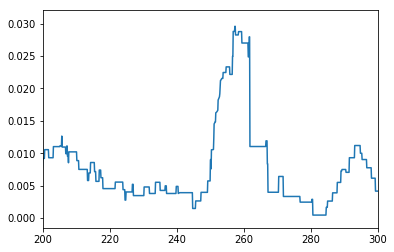

In [8]:
plt.plot(hst.time,hst.sfr10)
plt.xlim(200,300)

__Read simulation input parameters using read_athinput__

In [2]:
model = 'R8_8pc_newacc_zmax1024'
datadir = os.path.join('/scratch/gpfs/jk11/radps_postproc/',model)
#datadir = os.path.join('/home/jk11/athena-tigress/bin/)
fathinput = os.path.join(datadir, 'out.txt')
par = tp.read_athinput(fathinput) # par is a namedtuple object
#print(type(par.problem)) # each item of par is a dictionary
blocks = ['problem', 'radps']
for block in blocks:
    print('<{0:s}>'.format(block))
    for k, v in getattr(par, block).iteritems():
        print('*',k,':',v)
    print('\n')

<problem>
* num_end : 400
* num_start : 250
* L_thres_frac_ru[0] : 0.01
* active_age : 40.0
* L_thres_frac_ru[1] : 0.01
* basedir : /tigress/jk11/radps_postproc/R8_8pc_newacc
* with_runaway : 1
* teject_runaway : 5.0
* grow_age : 4.0
* L_thres_frac_cl[0] : 0.001
* L_thres_frac_cl[1] : 0.01
* rho_crit : 1.0
* num_step : 1
* qshear : 1.0
* Omega : 28.e-3
* problem_id : R8_8pc_newacc
* gamma : 1.66666666667


<radps>
* zm : -205.0
* nexitPP_max_def : 100
* hnu[0] : 18.0
* tau_max : 10.0
* min_pix_level : 4
* sigma_ph[0] : 2.7e-18
* dt_sub_min : 0.0
* dt_sub_no : 10.0
* zp : 205.0
* nfreq : 2
* zmaxPP : 2048.0
* kappa_dust[1] : 500.0
* xymaxPP : 1024.0
* maxiter : 500
* ray_number : 4
* sigma_ph[1] : 0.0
* nfreq_ion : 1
* apply_rad_force : 0
* dt_rayt_over_dt_2p : 1.0
* N_mu : 512
* kappa_dust[0] : 500.0
* postprocessing : 1
* hnu[1] : 10.0
* rotate_interval : 1




__Read vtk file using yt and add derived fields__

In [ ]:
num = 1
model = 'R8_8pc_newacc_zmax1024'
datadir = os.path.join('/scratch/gpfs/jk11/radps_postproc/',model)
filename = os.path.join(datadir, '{0:s}.{1:04d}.vtk'.format(par.job['problem_id'],num))
ds = yt.load(filename, units_override=tp.units_override)
tp.add_fields(ds, IXN=3)
da = ds.all_data()

In [25]:
fstar = os.path.join(datadir,'id0/{0:s}.{1:04d}.starpar.vtk'.format(par.job['problem_id'],num))
sp = tp.read_starpar_vtk(fstar)

array([   0,    1,    2,   21,   42,   47,   51,   61,   62,   67,   82,
         96,  105,  167,  184,  194,  203, 1381, 1452, 1512, 1528, 1634,
       1675, 1754, 1770, 1794, 1887, 1920, 2149, 2224, 2270, 2300, 2421,
       2539, 2579, 2619, 2691, 2906, 3001, 3090, 3209, 3234, 3273, 3373,
       3444, 3676, 3723, 3786, 3822, 3902, 3911, 3912, 4026, 4037, 4054,
       4179, 4242, 4300, 4496, 4541, 4583, 4790, 4892, 4921, 4926, 4962,
       4967, 5049, 5150, 5169, 5190, 5210, 5219, 5270, 5287, 5375, 5442,
       5456, 5514, 5530, 5735, 5758, 5817, 5943, 6022, 6055, 6068, 6124,
       6141, 6158, 6164, 6168, 6179, 6184, 6195, 6196, 6220, 6221, 6225,
       6227, 6232, 6235, 6246, 6250, 6254, 6256, 6261, 6262, 6265, 6266,
       6275, 6276, 6277, 6282, 6283, 6285, 6287, 6288, 6289, 6294, 6300,
       6302, 6305, 6308, 6311, 6312, 6320, 6327, 6336, 6338, 6339, 6346,
       6348, 6354, 6356, 6358, 6359, 6360, 6361, 6367, 6370, 6375, 6382,
       6384, 6385, 6390, 6392, 6396, 6397, 6398, 64

In [16]:
fields = ['nH', 'xn', 'G0prime0', 'G0prime1']
sl = yt.SlicePlot(ds, fields=fields, axis='x')
sl.show()

<function tigradpy.read_starpar_vtk.read_starpar_vtk>


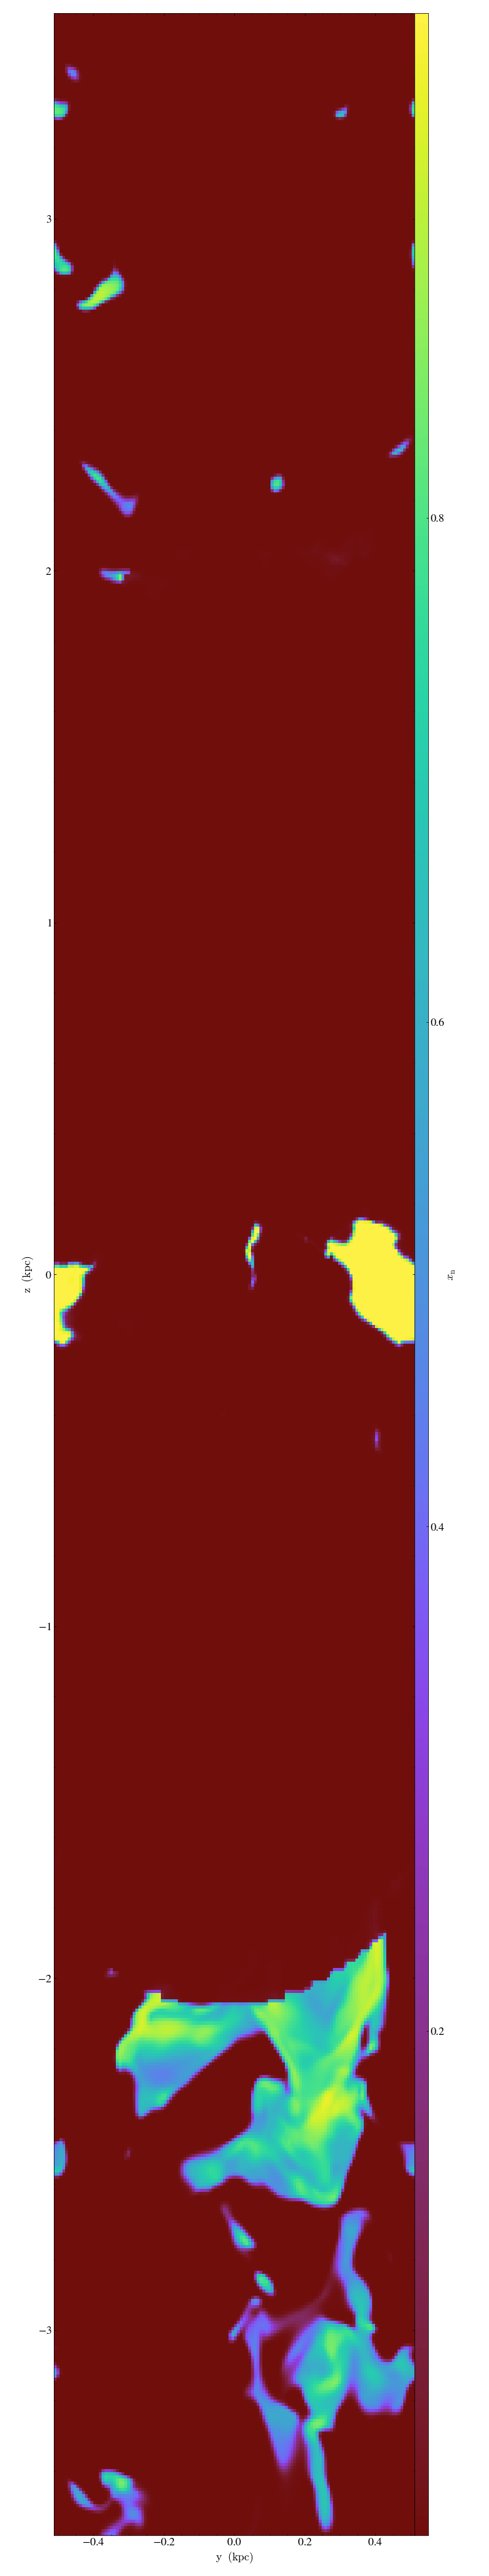
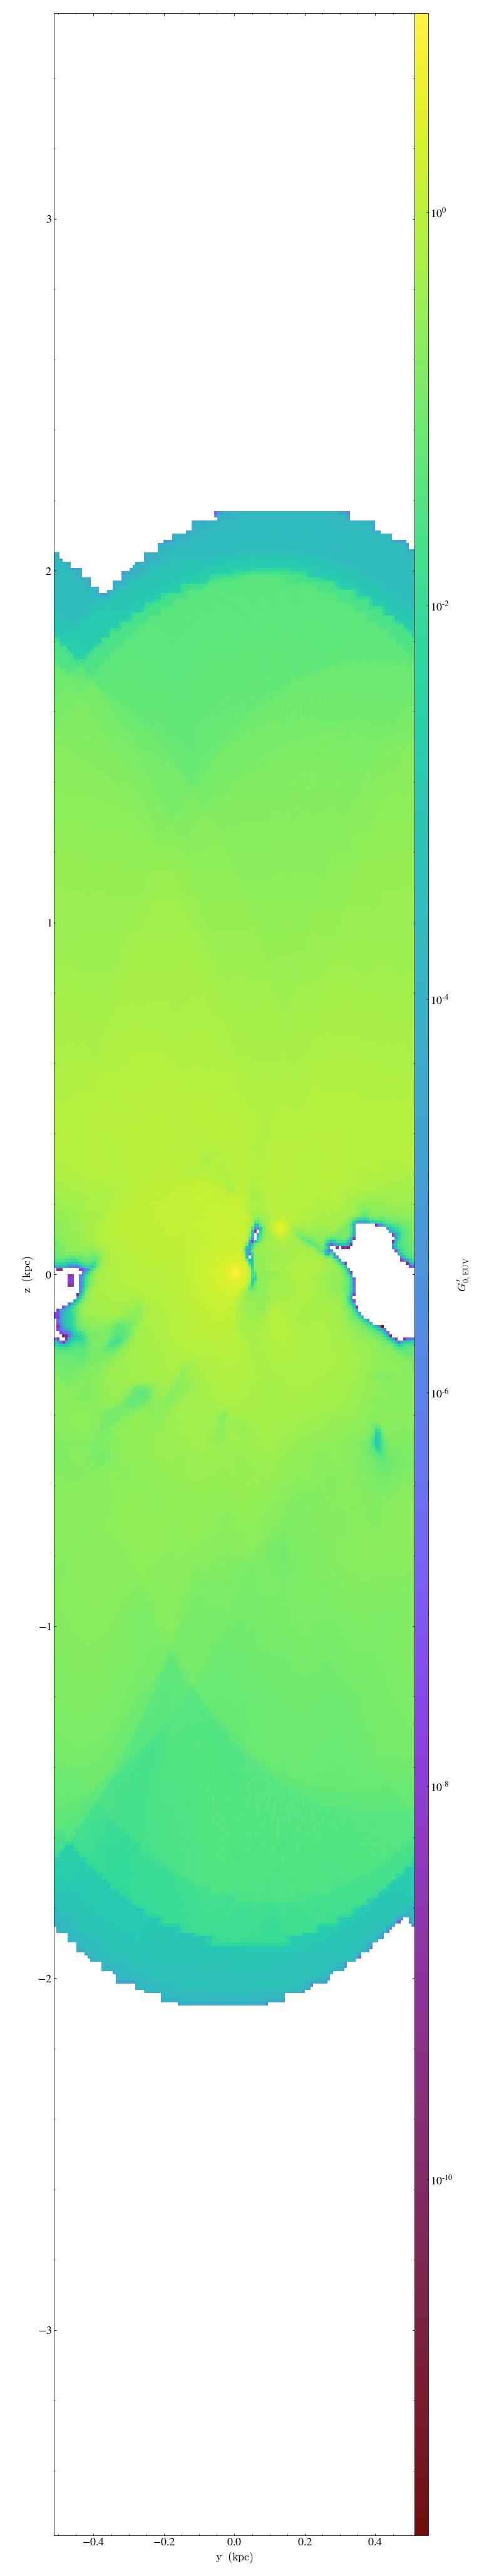
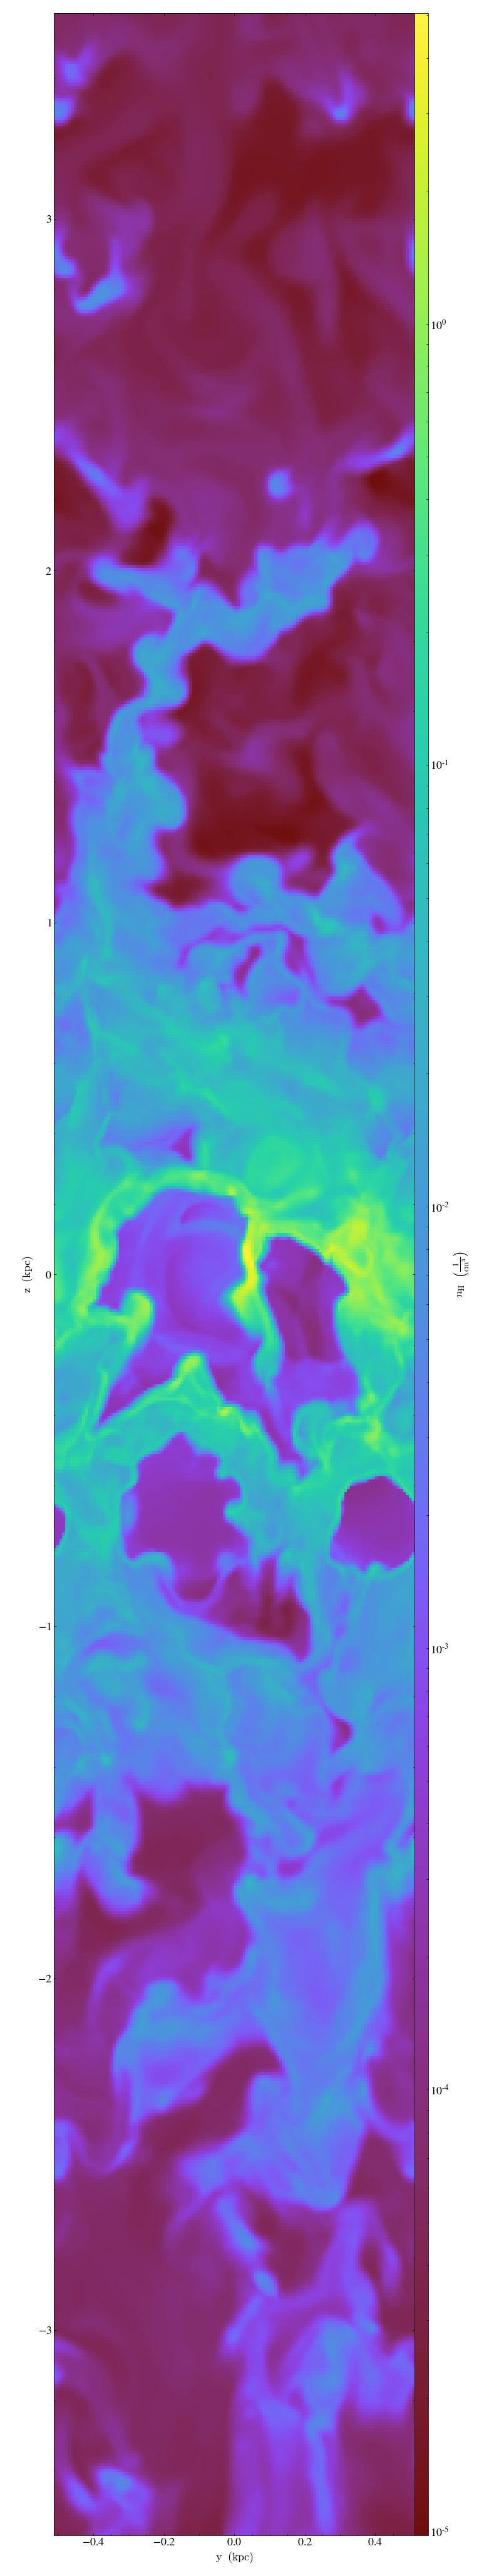
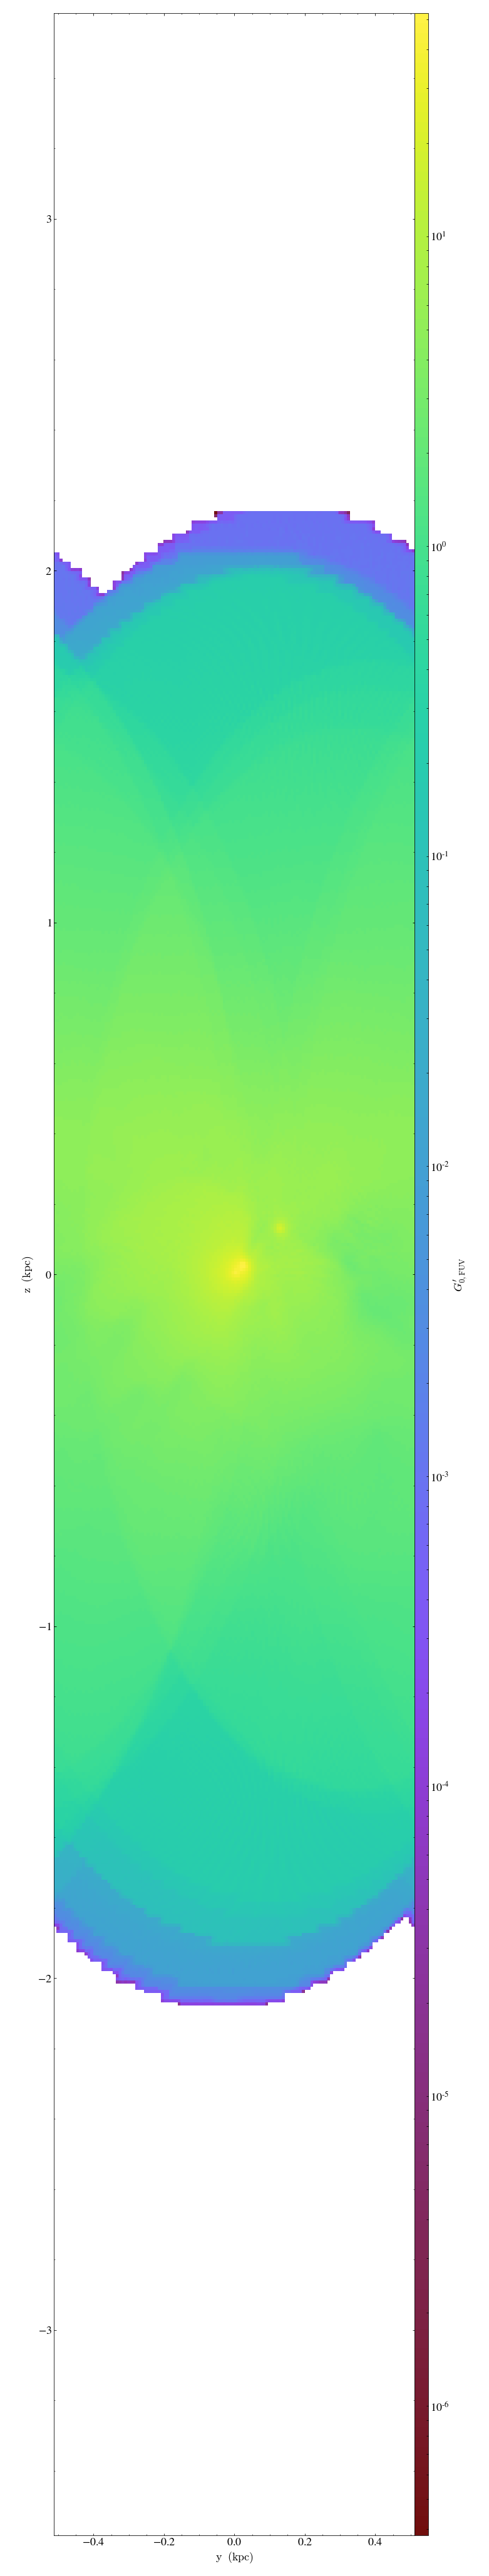

(14680064,)

__Plot multiple snapshots and save__

In [9]:
from __future__ import print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import yt
sys.path.insert(0, '../../')
import tigradpy as tp
yt.funcs.mylog.setLevel(50) # suppress log messages except for critical ones

fields = ['nH', 'xn', 'G0prime0', 'G0prime1']
kind = (['slice','y'],['slice','z'],
        ['projection','y'],['projection','z'])
#kind = [['projection','y']]

model = 'R8_8pc_newacc_zmax1024'
datadir = os.path.join('/scratch/gpfs/jk11/radps_postproc/',model)
#datadir = os.path.join('/home/jk11/athena-tigress/bin/')
fathinput = os.path.join(datadir, 'out.txt')
par = tp.read_athinput(fathinput) # par is a namedtuple object

num = range(1, 2, 1)
savdir = os.path.join('/tigress/jk11/snapshots-{0:s}/'.format(model))
if not os.path.exists(savdir):
    os.makedirs(savdir)

for num_ in num:
    print(num_, end=' ')
    filename = os.path.join(datadir,\
       '{0:s}.{1:04d}.vtk'.format(par.job['problem_id'], num_))
    print(filename)

    ds_ = yt.load(filename, units_override=tp.units_override)
    tp.add_fields(ds_, IXN=3)
    for kind_, axis_ in kind:
        fname = '{0:s}_{1:s}_{2:04d}.png'.format(kind_, axis_, num_)
        p_ = tp.yt_multipanel(ds_, kind_, axis_, fields=fields)
        # add time stamp and save
        fig = p_.plots[fields[0]].figure # reference to the mpl figure
        ax = fig.axes[0]
        ax.set_title('time {0:5.1f}'.format(ds_.current_time))
        fig.savefig(os.path.join(savdir, fname))
        plt.close(fig)

1 /scratch/gpfs/jk11/radps_postproc/R8_8pc_newacc_zmax1024/R8_8pc_newacc.0001.vtk


__Read zprof__

In [44]:
zpa = tp.read_zprof_all(datadir + '/id0', par.job['problem_id'], phase='whole')

In [63]:
zpa.fields

<xarray.DataArray 'fields' (fields: 76)>
array(['z', 'A', 'd', 'v1', 'v2', 'v3', 'M1', 'M2', 'M3', 'Ek1', 'Ek2', 'Ek3',
       'P', 'T', 'dM2', 'dEk2', 'Phie', 'gext', 'dWext', 'Phisg', 'gsg',
       'dWsg', 'Ber', 'cool', 'heat', 's1', 's2', 's3', 's4', 'pA', 'pd',
       'pvz', 'pFzd', 'pFzM1', 'pFzM2', 'pFzM3', 'pFzE1', 'pFzE2', 'pFzE3',
       'pFzP', 'pFzEge', 'pFzEgsg', 'pFzEtidal', 'pFzs1', 'pFzs2', 'pFzs3',
       'pFzs4', 'mA', 'md', 'mvz', 'mFzd', 'mFzM1', 'mFzM2', 'mFzM3', 'mFzE1',
       'mFzE2', 'mFzE3', 'mFzP', 'mFzEge', 'mFzEgsg', 'mFzEtidal', 'mFzs1',
       'mFzs2', 'mFzs3', 'mFzs4', 'RxyL', 'RxyR', 'Erad0', 'Frad_x0',
       'Frad_y0', 'Frad_z0', 'Erad1', 'Frad_x1', 'Frad_y1', 'Frad_z1', 'nesq'],
      dtype=object)
Coordinates:
  * fields   (fields) object 'z' 'A' 'd' 'v1' 'v2' 'v3' 'M1' 'M2' 'M3' 'Ek1' ...

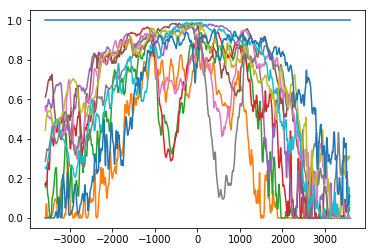

In [73]:
plt.plot(zpa.z,zpa.loc['s4']/zpa.loc['d'])

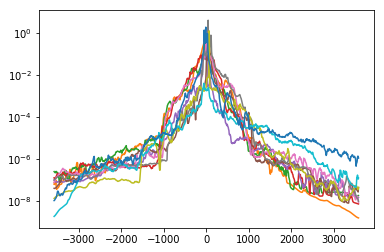

In [59]:
plt.semilogy(zpa.z,zpa.loc['nesq']/zpa.loc['A'])